<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/testdrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test Drive com tensorflow 2.0+keras em classificação binária (Iris dataset..setosa ou não)

In [0]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
print(tf.__version__)

2.0.0


Vamos instalar tensorflow 2.0...se necessário

In [3]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 63kB/s 
     |████████████████████████████████| 3.8MB 38.5MB/s 
     |████████████████████████████████| 450kB 57.7MB/s 
     |████████████████████████████████| 81kB 11.9MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [3]:
iris = load_iris()
X = iris['data']
y = iris['target']
X[:10],y[:10]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

Vamos fazer classificação binária (classe 0 (Setosa) ou não).
Para isso, temos que alterar o target (0, vira 1, o resto vira 0)

In [5]:
for i in range(len(y)) :
  if y[i]==0:y[i]=1
  else: y[i]=0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

O Target para Tensorflow/Keras deve ser um vetor de n linhas e 1 coluna. Vamos alterar o shape..

In [6]:
y=y.reshape((-1,1))
print(y[:10])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,
                                activation=tf.nn.sigmoid,
                                input_shape=(X.shape[1], )))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train,
                 y_train,
                 validation_data=(X_test,y_test),
                 epochs=300,
                 verbose=1)


Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 4ms/sample - loss: 3.2839 - accuracy: 0.2952 - val_loss: 2.7180 - val_accuracy: 0.4222
Epoch 2/300
105/105 [==============================] - 0s 228us/sample - loss: 3.2380 - accuracy: 0.2952 - val_loss: 2.6805 - val_accuracy: 0.4222
Epoch 3/300
105/105 [==============================] - 0s 239us/sample - loss: 3.1917 - accuracy: 0.2952 - val_loss: 2.6422 - val_accuracy: 0.4222
Epoch 4/300
105/105 [==============================] - 0s 234us/sample - loss: 3.1466 - accuracy: 0.2952 - val_loss: 2.6033 - val_accuracy: 0.4222
Epoch 5/300
105/105 [==============================] - 0s 275us/sample - loss: 3.1003 - accuracy: 0.2952 - val_loss: 2.5646 - val_accuracy: 0.4222
Epoch 6/300
105/105 [==============================] - 0s 236us/sample - loss: 3.0553 - accuracy: 0.2952 - val_loss: 2.5259 - val_accuracy: 0.4222
Epoch 7/300
105/105 [==============================] - 0s 237us/sample - lo

Acompanhamento da convergência do modelo

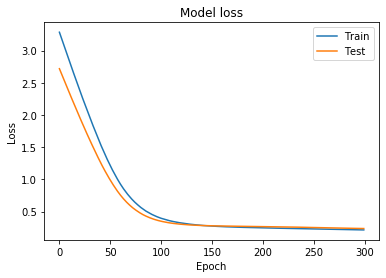

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

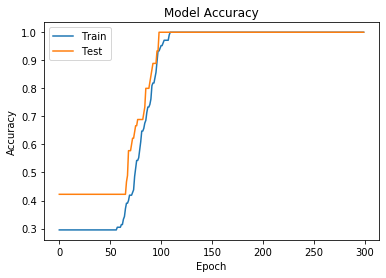

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Dados sobre o modelo

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.weights #os parâmetros do modelo

[<tf.Variable 'dense_1/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-0.23687287],
        [-0.17132577],
        [ 0.27488634],
        [ 1.5097218 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.3467143], dtype=float32)>]

In [22]:
model.predict_classes([X[0:1]])

array([[0]], dtype=int32)

In [23]:
model.evaluate(X_test,y_test)

45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2374152276251051, 1.0]